In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats 
import warnings 
warnings.filterwarnings('ignore')
from datetime import datetime
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = (10,8)
plt.rcParams["figure.dpi"] = 75 

In [3]:
df_consolidados = pd.read_excel("/content/drive/MyDrive/Proyecto Innovación 1/Metodología/Datos/Consolidado TUU Pagos 2022.xlsx")

In [4]:
df_consolidados.sample(3)

,RUT,Razón social,Código de comercio,Código SII,Porcentaje comision,Comision fija,Cantidad TXs,Monto Total,Comision Neta,Comision IVA,...,MDR Mayo Supuesto,Costo tx Mayo REAL,Margen tx Mayo REAL,Costo tx Mayo Supuesto,Margen tx Mayo Supuesto,MCC,Partner,Categoría Partner,Tarifa Partner,Margen Partner
15436,77179724-5,KIONETT SPA,597039288494,472101.0,1.29,0.0,583.0,2366780.0,30544.0,5808.0,...,0.0113,26744.614,3799.386,26744.614,3799.386,SUPERMERCADOS,No Partner,No Partner,0.0129,0.00
10432,16722151-3,MARIA JOSÉ MORALES QUIROZ,597039253534,472101.0,1.39,0.0,1004.0,7121210.0,98979.0,18803.0,...,0.0113,80469.673,18509.327,80469.673,18509.327,SUPERMERCADOS,benja-brito@hotmail.com,Platinum,0.0129,7121.21
2396,12401962-1,SUSANA DEL CARMEN CAVADA CISTERNAS,597039285428,561000.0,1.29,0.0,427.0,2869150.0,37003.0,7017.0,...,0.0108,30986.820,6016.180,30986.820,6016.180,RESTAURANT FAST FOOD,No Partner,No Partner,0.0129,0.00


In [5]:
from itertools import cycle
 
def validarRut(rut):
	rut = rut.upper();
	rut = rut.replace("-","")
	rut = rut.replace(".","")
	aux = rut[:-1]
	dv = rut[-1:]
 
	revertido = map(int, reversed(str(aux)))
	factors = cycle(range(2,8))
	s = sum(d * f for d, f in zip(revertido,factors))
	res = (-s)%11
 
	if str(res) == dv:
		return True
	elif dv=="K" and res==10:
		return True
	else:
		return False

In [6]:
df_consolidados["aux_rut"] = df_consolidados["RUT"].apply(lambda x : validarRut(x))

In [7]:
df_consolidados_aux = df_consolidados.copy()
df_consolidados_aux.drop(columns = ["Código de comercio", "Porcentaje comision 2", 'MDR Abril Débito', 'MDR Abril Crédito',
       'Costo tx Abril', 'Margen tx Abril', 'MDR Mayo REAL',
       'MDR Mayo Supuesto', 'Costo tx Mayo REAL', 'Margen tx Mayo REAL',
       'Costo tx Mayo Supuesto', 'Margen tx Mayo Supuesto', "Tarifa Partner", "Margen Partner", "aux_rut", "Partner",
       "Categoría Partner"], inplace = True)

In [8]:
df_consolidados_aux.rename(columns = {"Razón social":"razonSocial", "Código SII":"codSII", "Porcentaje comision":"porcentajeComision", "Comision fija":"comisionFija",
                                  "Cantidad TXs":"cantidadTransacciones", "Monto Total":"montoTotal", "Comision Neta":"comisionNeta",
                                  "Comision IVA":"comisionIVA", "Categoría Partner":"categoriaPartner"}, inplace = True)

In [9]:
df_consolidados_aux.sample(3)

,RUT,razonSocial,codSII,porcentajeComision,comisionFija,cantidadTransacciones,montoTotal,comisionNeta,comisionIVA,Tipo,Período,MCC
6973,10437547-2,ROBERTO CRISTIAN CANELEO SILVA,477203.0,2.51,0.0,16.0,154200.0,3872.0,736.0,CREDITO,2022-03-01,PERFUMERIAS
7185,15460234-8,Rodrigo Agustin Bravo reyes,561000.0,2.25,0.0,16.0,246300.0,5541.0,1056.0,CREDITO,2022-03-01,RESTAURANT FAST FOOD
11660,76891842-2,CARDOZO AUTOMOTRIZ SPA,452002.0,1.29,0.0,212.0,12288520.0,158520.0,30127.0,DEBITO,2022-04-01,GARAGES


In [10]:
def getfreqcred(rut):
  df_rut = df_consolidados_enero[df_consolidados_enero["RUT"] == rut]
  return df_rut[df_rut["Tipo"] == "CREDITO"].shape[0]

In [11]:
def getfreqdeb(rut):
  df_rut = df_consolidados_enero[df_consolidados_enero["RUT"] == rut]
  return df_rut[df_rut["Tipo"] == "DEBITO"].shape[0]

In [12]:
df_consolidados_aux.Período.value_counts()

2022-05-01    4897
2022-04-01    4079
2022-03-01    3366
2022-02-01    2731
2022-01-01    2246
Name: Período, dtype: int64

## Enero 

In [13]:
df_consolidados_enero = df_consolidados_aux[df_consolidados_aux["Período"].dt.month == 1]
df_consolidados_aux_enero = df_consolidados_enero.copy()

In [14]:
df_consolidados_enero.sample(2)

,RUT,razonSocial,codSII,porcentajeComision,comisionFija,cantidadTransacciones,montoTotal,comisionNeta,comisionIVA,Tipo,Período,MCC
1019,77368975-K,COMERCIALIZADORA CRISTIAN TORRES ROA E.I.R.L.,477394.0,1.29,0.0,48.0,1079960.0,13925.0,2650.0,DEBITO,2022-01-01,JOYERIAS Y RELOJERIAS
83,11557306-3,CLAUDIA PAOLA ROJAS CABRERA,472101.0,1.29,0.0,101.0,705450.0,9099.0,1736.0,DEBITO,2022-01-01,SUPERMERCADOS


In [15]:
df_montoTotal_enero = df_consolidados_enero.groupby(['RUT'])['montoTotal'].sum().to_frame().reset_index()
df_cantTxs_enero = df_consolidados_enero.groupby(['RUT'])['cantidadTransacciones'].sum().to_frame().reset_index()
df_neta_enero = df_consolidados_enero.groupby(['RUT'])['comisionNeta'].sum().to_frame().reset_index()
df_iva_enero = df_consolidados_enero.groupby(['RUT'])['comisionIVA'].sum().to_frame().reset_index()
df_porcentajeComision_enero = df_consolidados_enero.groupby(['RUT'])["porcentajeComision"].mean().to_frame()

In [16]:
df_consolidados_enero.drop(columns = ["montoTotal", "cantidadTransacciones", "comisionNeta", "comisionIVA", "porcentajeComision", "comisionFija", "razonSocial"], inplace = True)
df_consolidados_enero["debito"] = df_consolidados_enero["RUT"].apply(lambda x : getfreqdeb(x))
df_consolidados_enero["credito"] = df_consolidados_enero["RUT"].apply(lambda x : getfreqcred(x))

In [17]:
df_consolidados_enero.drop(columns = ["Tipo"], inplace = True)
df_debito_enero = df_consolidados_enero.groupby(['RUT'])["debito"].mean().to_frame()
df_credito_enero = df_consolidados_enero.groupby(['RUT'])["credito"].mean().to_frame()

In [18]:
df_consolidados_enero.drop_duplicates(inplace = True)

In [19]:
df_consolidados_enero.drop_duplicates(subset = "RUT", keep="first", inplace = True)

In [20]:
data_frames_enero = [df_montoTotal_enero, df_cantTxs_enero, df_neta_enero, df_iva_enero, df_porcentajeComision_enero,
                     df_debito_enero, df_credito_enero, df_consolidados_enero]

In [21]:
from functools import reduce
df_enero = reduce(lambda  left,right: pd.merge(left,right,on=['RUT']), data_frames_enero)

In [22]:
df_enero["porcentajeComision"] = df_enero["porcentajeComision"].round(decimals = 2)

In [23]:
df_enero.drop(columns = ["debito_x", "credito_x"], inplace=True)
df_enero.rename(columns = {"credito_y":"credito", "debito_y":"debito"}, inplace = True)

In [24]:
df_enero.sample(2)

,RUT,montoTotal,cantidadTransacciones,comisionNeta,comisionIVA,porcentajeComision,codSII,Período,MCC,debito,credito
823,77218268-6,1513200.0,180.0,19795.0,3773.0,1.71,472300.0,2022-01-01,INSUMOS Y SUMINISTROS INDUSTR.,1,1
670,76894196-3,23771920.0,730.0,330781.0,62902.0,1.90,521009.0,2022-01-01,OTROS SERVICIOS PROFESIONALES,1,1


merge c/ incidencias

In [25]:
df_incidencias = pd.read_excel("/content/drive/MyDrive/Proyecto Innovación 1/Metodología/Datos/Incidencias Christian RPA- HES.xlsx", "IncidenciasHES")
df_incidencias = df_incidencias[df_incidencias['RUT Empresa'].notna()]
df_ocurrencias  = df_incidencias["RUT Empresa"].value_counts().rename_axis('RUT').reset_index(name='count_hes')

In [26]:
df_enero = pd.merge(df_enero, df_ocurrencias, on = ["RUT"], how= "outer")
df_enero = df_enero[df_enero['montoTotal'].notna()]

In [27]:
df_enero["has_hes"] = np.where((df_enero["count_hes"].isnull()), 0, 1)
df_enero.drop(columns = ["count_hes"], inplace = True)

In [28]:
df_enero.shape

(1234, 12)

In [29]:
df_enero.sample(4)

,RUT,montoTotal,cantidadTransacciones,comisionNeta,comisionIVA,porcentajeComision,codSII,Período,MCC,debito,credito,has_hes
148,12895276-4,1501960.0,141.0,19664.0,3740.0,1.84,472109.0,2022-01-01,OTRAS TIENDAS DE ALIMENTOS,1.0,1.0,1
438,5123009-4,3534160.0,564.0,45910.0,8698.0,1.90,472200.0,2022-01-01,"BOTILLERIAS,VINAS",1.0,1.0,0
646,76842338-5,27345008.0,2358.0,354976.0,67468.0,1.80,472101.0,2022-01-01,SUPERMERCADOS,3.0,3.0,1
860,77268317-0,3246470.0,1104.0,46038.0,8755.0,1.90,472101.0,2022-01-01,SUPERMERCADOS,1.0,1.0,0


In [30]:
df_enero.drop(columns = "Período", inplace = True)

In [31]:
#df_enero.to_csv("df_enero.csv")

In [116]:
df_enero.describe()

,montoTotal,cantidadTransacciones,comisionNeta,comisionIVA,porcentajeComision,codSII,debito,credito,has_hes
count,1.234000e+03,1234.000000,1.234000e+03,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000
mean,2.537922e+06,214.808752,3.454721e+04,6565.820097,1.594935,491037.269854,1.083468,0.736629,0.354133
std,5.855862e+06,445.437440,8.280201e+04,15737.203457,0.300378,178142.949913,0.448845,0.614375,0.478444
min,1.000000e+02,1.000000,1.000000e+00,0.000000,0.130000,11306.000000,0.000000,0.000000,0.000000
25%,2.136450e+05,17.000000,2.815000e+03,535.750000,1.290000,472101.000000,1.000000,0.000000,0.000000
50%,8.312860e+05,72.000000,1.093400e+04,2076.500000,1.690000,472200.000000,1.000000,1.000000,0.000000
75%,2.387512e+06,219.000000,3.177500e+04,6036.500000,1.800000,522172.500000,1.000000,1.000000,1.000000
max,6.917800e+07,5633.000000,1.055153e+06,200810.000000,2.510000,960909.000000,7.000000,6.000000,1.000000


Text(0.5, 0, 'Atributos')

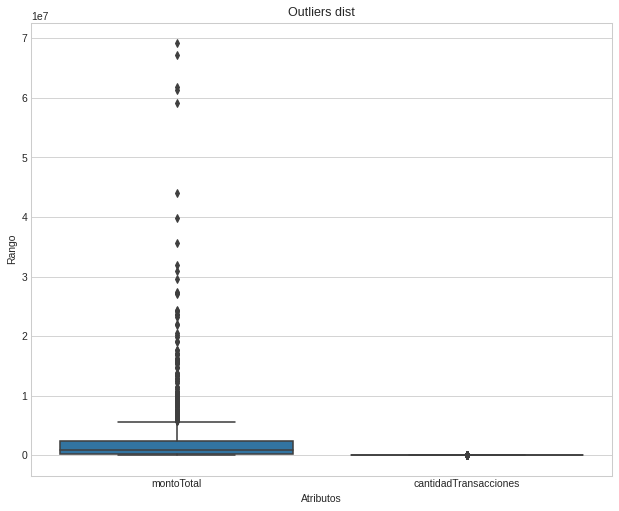

In [121]:
attr = ["montoTotal", "cantidadTransacciones"]
plt.figure(figsize = (10,8))
sns.boxplot(data = df_enero[attr], orient = "v")
plt.title("Outliers dist")
plt.ylabel("Rango")
plt.xlabel("Atributos")

## Febrero

In [32]:
df_consolidados_febrero = df_consolidados_aux[df_consolidados_aux["Período"].dt.month == 2]
df_consolidados_aux_febrero = df_consolidados_febrero.copy()

In [33]:
df_consolidados_febrero.sample(2)

,RUT,razonSocial,codSII,porcentajeComision,comisionFija,cantidadTransacciones,montoTotal,comisionNeta,comisionIVA,Tipo,Período,MCC
4540,77112459-3,La Pepita de Oro Spa,13000.0,2.34,0.0,5.0,63500.0,1486.0,281.0,CREDITO,2022-02-01,JARDINES BOTANICOS
4855,77499142-5,COMERCIALIZADORA DE ALIMENTOS GERMÁN IGNACIO C...,472101.0,2.32,0.0,31.0,171420.0,3977.0,756.0,CREDITO,2022-02-01,SUPERMERCADOS


In [34]:
df_montoTotal_febrero = df_consolidados_febrero.groupby(['RUT'])['montoTotal'].sum().to_frame().reset_index()
df_cantTxs_febrero = df_consolidados_febrero.groupby(['RUT'])['cantidadTransacciones'].sum().to_frame().reset_index()
df_neta_febrero = df_consolidados_febrero.groupby(['RUT'])['comisionNeta'].sum().to_frame().reset_index()
df_iva_febrero = df_consolidados_febrero.groupby(['RUT'])['comisionIVA'].sum().to_frame().reset_index()
df_porcentajeComision_febrero = df_consolidados_febrero.groupby(['RUT'])["porcentajeComision"].mean().to_frame()

In [35]:
df_consolidados_febrero.sample(2)

,RUT,razonSocial,codSII,porcentajeComision,comisionFija,cantidadTransacciones,montoTotal,comisionNeta,comisionIVA,Tipo,Período,MCC
3481,77405767-6,GRUPO LM SPA,862021.0,1.14,0.0,1.0,100.0,1.0,0.0,DEBITO,2022-02-01,CLINICAS
4228,6604045-3,ALEJANDRO SEGUNDO SEPULVEDA HERRERA,475201.0,2.22,0.0,2.0,60000.0,1332.0,254.0,CREDITO,2022-02-01,BALDOSAS Y PISOS


In [36]:
def getfreqcred(rut):
  df_rut = df_consolidados_febrero[df_consolidados_febrero["RUT"] == rut]
  return df_rut[df_rut["Tipo"] == "CREDITO"].shape[0]

In [37]:
def getfreqdeb(rut):
  df_rut = df_consolidados_febrero[df_consolidados_febrero["RUT"] == rut]
  return df_rut[df_rut["Tipo"] == "DEBITO"].shape[0]

In [38]:
df_consolidados_febrero.drop(columns = ["montoTotal", "cantidadTransacciones", "comisionNeta", "comisionIVA", "porcentajeComision", "comisionFija", "razonSocial"], inplace = True)
df_consolidados_febrero["debito"] = df_consolidados_febrero["RUT"].apply(lambda x : getfreqdeb(x))
df_consolidados_febrero["credito"] = df_consolidados_febrero["RUT"].apply(lambda x : getfreqcred(x))

In [39]:
df_consolidados_febrero.drop(columns = ["Tipo"], inplace = True)
df_debito_febrero = df_consolidados_febrero.groupby(['RUT'])["debito"].mean().to_frame()
df_credito_febrero = df_consolidados_febrero.groupby(['RUT'])["credito"].mean().to_frame()

In [40]:
df_consolidados_febrero.drop_duplicates(inplace = True)

In [41]:
df_consolidados_febrero.drop_duplicates(subset = "RUT", keep="first", inplace = True)

In [42]:
data_frames_febrero = [df_montoTotal_febrero, df_cantTxs_febrero, df_neta_febrero, df_iva_febrero, df_porcentajeComision_febrero,
                     df_debito_febrero, df_credito_febrero, df_consolidados_febrero]

In [43]:
from functools import reduce
df_febrero = reduce(lambda  left,right: pd.merge(left,right,on=['RUT']), data_frames_febrero)

In [44]:
df_febrero["porcentajeComision"] = df_febrero["porcentajeComision"].round(decimals = 2)

In [45]:
df_febrero.drop(columns = ["debito_x", "credito_x"], inplace=True)
df_febrero.rename(columns = {"credito_y":"credito", "debito_y":"debito"}, inplace = True)

In [46]:
df_febrero.sample(2)

,RUT,montoTotal,cantidadTransacciones,comisionNeta,comisionIVA,porcentajeComision,codSII,Período,MCC,debito,credito
781,76828983-2,299860.0,48.0,3829.0,728.0,1.79,475201.0,2022-02-01,BALDOSAS Y PISOS,1,1
1237,77468494-8,4683827.0,271.0,62724.0,11927.0,1.77,561000.0,2022-02-01,RESTAURANT FAST FOOD,1,1


merge c/ incidencias

In [47]:
df_febrero = pd.merge(df_febrero, df_ocurrencias, on = ["RUT"], how= "outer")
df_febrero = df_febrero[df_febrero['montoTotal'].notna()]

In [48]:
df_febrero["has_hes"] = np.where((df_febrero["count_hes"].isnull()), 0, 1)
df_febrero.drop(columns = ["count_hes"], inplace = True)

In [49]:
df_febrero.shape

(1495, 12)

In [50]:
df_febrero.sample(4)

,RUT,montoTotal,cantidadTransacciones,comisionNeta,comisionIVA,porcentajeComision,codSII,Período,MCC,debito,credito,has_hes
189,13086912-2,359830.0,136.0,4679.0,892.0,1.80,472101.0,2022-02-01,SUPERMERCADOS,1.0,1.0,0
1188,77445505-1,267045.0,16.0,3459.0,658.0,1.56,477202.0,2022-02-01,ARTICULOS ORTOPEDICOS,1.0,1.0,0
1492,9979750-9,134530.0,57.0,1417.0,272.0,1.50,472105.0,2022-02-01,PANADERIAS,1.0,1.0,0
634,76186000-3,2099580.0,112.0,28462.0,5401.0,1.77,561000.0,2022-02-01,RESTAURANT FAST FOOD,1.0,1.0,0


In [51]:
df_febrero.drop(columns = "Período", inplace = True)

In [52]:
#df_febrero.to_csv("df_febrero.csv")

In [117]:
df_febrero.describe()

,montoTotal,cantidadTransacciones,comisionNeta,comisionIVA,porcentajeComision,codSII,debito,credito,has_hes
count,1.495000e+03,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000
mean,2.898210e+06,237.422742,39105.915719,7432.081605,1.591552,491375.878261,1.082274,0.744482,0.323077
std,5.998362e+06,471.985314,82674.895621,15712.183085,0.294861,175428.919897,0.396504,0.609163,0.467808
min,1.000000e+02,1.000000,1.000000,0.000000,0.130000,11306.000000,0.000000,0.000000,0.000000
25%,2.638200e+05,19.000000,3432.500000,654.000000,1.290000,472101.000000,1.000000,0.000000,0.000000
50%,9.126500e+05,81.000000,12201.000000,2321.000000,1.690000,472200.000000,1.000000,1.000000,0.000000
75%,2.939100e+06,259.000000,39106.000000,7428.000000,1.800000,536995.500000,1.000000,1.000000,1.000000
max,6.250644e+07,6925.000000,923509.000000,175753.000000,2.510000,960909.000000,6.000000,6.000000,1.000000


Text(0.5, 0, 'Atributos')

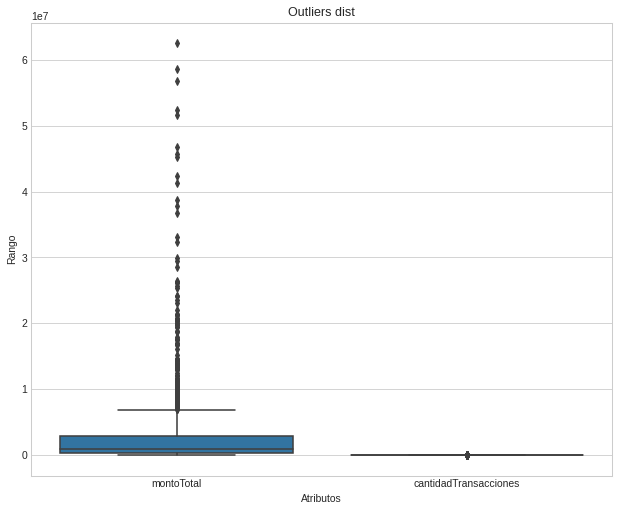

In [122]:
attr = ["montoTotal", "cantidadTransacciones"]
plt.figure(figsize = (10,8))
sns.boxplot(data = df_febrero[attr], orient = "v")
plt.title("Outliers dist")
plt.ylabel("Rango")
plt.xlabel("Atributos")

## Marzo 

In [53]:
df_consolidados_marzo = df_consolidados_aux[df_consolidados_aux["Período"].dt.month == 3]
df_consolidados_aux_marzo = df_consolidados_marzo.copy()

In [54]:
df_consolidados_marzo.sample(2)

,RUT,razonSocial,codSII,porcentajeComision,comisionFija,cantidadTransacciones,montoTotal,comisionNeta,comisionIVA,Tipo,Período,MCC
7481,76301990-K,INVERSIONES FOX LIMITADA,619010.0,0.21,0.0,59.0,1417499.0,2975.0,569.0,CREDITO,2022-03-01,"SERV.ONLINE, INTERNET, BOLETINES, ETC."
4985,10056607-9,Nadia Patricia Alfaro Rojas,472101.0,1.29,0.0,33.0,120860.0,1559.0,299.0,DEBITO,2022-03-01,SUPERMERCADOS


In [55]:
df_montoTotal_marzo = df_consolidados_marzo.groupby(['RUT'])['montoTotal'].sum().to_frame().reset_index()
df_cantTxs_marzo = df_consolidados_marzo.groupby(['RUT'])['cantidadTransacciones'].sum().to_frame().reset_index()
df_neta_marzo = df_consolidados_marzo.groupby(['RUT'])['comisionNeta'].sum().to_frame().reset_index()
df_iva_marzo = df_consolidados_marzo.groupby(['RUT'])['comisionIVA'].sum().to_frame().reset_index()
df_porcentajeComision_marzo = df_consolidados_marzo.groupby(['RUT'])["porcentajeComision"].mean().to_frame()

In [56]:
df_consolidados_marzo.sample(2)

,RUT,razonSocial,codSII,porcentajeComision,comisionFija,cantidadTransacciones,montoTotal,comisionNeta,comisionIVA,Tipo,Período,MCC
5803,76238407-8,SOCIEDAD ELABORADORA DE MADERAS PUNTOMADERAS L...,466301.0,1.17,0.0,2.0,377000.0,4410.0,838.0,DEBITO,2022-03-01,MATERIALES PARA CONSTRUCCION
5366,15610307-1,ANDRES ALEJANDRO VALLEJO ROJAS,472101.0,1.29,0.0,1427.0,6458700.0,83340.0,15834.0,DEBITO,2022-03-01,SUPERMERCADOS


In [57]:
def getfreqcred(rut):
  df_rut = df_consolidados_marzo[df_consolidados_marzo["RUT"] == rut]
  return df_rut[df_rut["Tipo"] == "CREDITO"].shape[0]

In [58]:
def getfreqdeb(rut):
  df_rut = df_consolidados_marzo[df_consolidados_marzo["RUT"] == rut]
  return df_rut[df_rut["Tipo"] == "DEBITO"].shape[0]

In [59]:
df_consolidados_marzo.drop(columns = ["montoTotal", "cantidadTransacciones", "comisionNeta", "comisionIVA", "porcentajeComision", "comisionFija", "razonSocial"], inplace = True)
df_consolidados_marzo["debito"] = df_consolidados_marzo["RUT"].apply(lambda x : getfreqdeb(x))
df_consolidados_marzo["credito"] = df_consolidados_marzo["RUT"].apply(lambda x : getfreqcred(x))

In [60]:
df_consolidados_marzo.drop(columns = ["Tipo"], inplace = True)
df_debito_marzo = df_consolidados_marzo.groupby(['RUT'])["debito"].mean().to_frame()
df_credito_marzo = df_consolidados_marzo.groupby(['RUT'])["credito"].mean().to_frame()

In [61]:
df_consolidados_marzo.drop_duplicates(inplace = True)

In [62]:
df_consolidados_marzo.drop_duplicates(subset = "RUT", keep="first", inplace = True)

In [63]:
data_frames_marzo = [df_montoTotal_marzo, df_cantTxs_marzo, df_neta_marzo, df_iva_marzo, df_porcentajeComision_marzo,
                     df_debito_marzo, df_credito_marzo, df_consolidados_marzo]

In [64]:
from functools import reduce
df_marzo = reduce(lambda  left,right: pd.merge(left,right,on=['RUT']), data_frames_marzo)

In [65]:
df_marzo["porcentajeComision"] = df_marzo["porcentajeComision"].round(decimals = 2)

In [66]:
df_marzo.drop(columns = ["debito_x", "credito_x"], inplace=True)
df_marzo.rename(columns = {"credito_y":"credito", "debito_y":"debito"}, inplace = True)

In [67]:
df_marzo.sample(2)

,RUT,montoTotal,cantidadTransacciones,comisionNeta,comisionIVA,porcentajeComision,codSII,Período,MCC,debito,credito
458,17240890-7,84100.0,16.0,1084.0,206.0,1.29,561000.0,2022-03-01,RESTAURANT FAST FOOD,1,0
1791,9404576-2,1658410.0,914.0,21657.0,4088.0,1.77,561000.0,2022-03-01,RESTAURANT FAST FOOD,1,1


merge c/ incidencias

In [68]:
df_marzo = pd.merge(df_marzo, df_ocurrencias, on = ["RUT"], how= "outer")
df_marzo = df_marzo[df_marzo['montoTotal'].notna()]

In [69]:
df_marzo["has_hes"] = np.where((df_marzo["count_hes"].isnull()), 0, 1)
df_marzo.drop(columns = ["count_hes"], inplace = True)

In [70]:
df_marzo.shape

(1832, 12)

In [71]:
df_marzo.sample(4)

,RUT,montoTotal,cantidadTransacciones,comisionNeta,comisionIVA,porcentajeComision,codSII,Período,MCC,debito,credito,has_hes
1626,77514858-6,1662600.0,153.0,22176.0,4207.0,1.88,476400.0,2022-03-01,JUGUETERIAS,1.0,1.0,1
1189,77232695-5,557600.0,42.0,8014.0,1528.0,1.88,476400.0,2022-03-01,JUGUETERIAS,1.0,1.0,0
34,10437547-2,9441910.0,1054.0,123666.0,23516.0,1.90,477203.0,2022-03-01,PERFUMERIAS,1.0,1.0,1
1342,77388774-8,1682200.0,188.0,23252.0,4422.0,1.90,476309.0,2022-03-01,CARPAS,1.0,1.0,1


In [72]:
df_marzo.drop(columns = "Período", inplace = True)

In [73]:
#df_marzo.to_csv("df_marzo.csv")

In [118]:
df_marzo.describe()

,montoTotal,cantidadTransacciones,comisionNeta,comisionIVA,porcentajeComision,codSII,debito,credito,has_hes
count,1.832000e+03,1832.000000,1.832000e+03,1832.000000,1832.000000,1832.000000,1832.000000,1832.000000,1832.000000
mean,2.523173e+06,227.231441,3.376781e+04,6417.845524,1.597724,491890.210153,1.080240,0.757096,0.296943
std,5.420318e+06,431.329606,7.513543e+04,14278.825266,0.301143,175409.986441,0.412267,0.611606,0.457036
min,1.000000e+02,1.000000,1.000000e+00,0.000000,0.130000,11306.000000,0.000000,0.000000,0.000000
25%,2.205675e+05,17.000000,2.846250e+03,540.750000,1.290000,472101.000000,1.000000,0.000000,0.000000
50%,8.559750e+05,77.000000,1.137500e+04,2164.000000,1.690000,472200.000000,1.000000,1.000000,0.000000
75%,2.535498e+06,243.250000,3.401375e+04,6476.500000,1.800000,553004.500000,1.000000,1.000000,1.000000
max,9.354460e+07,4749.000000,1.525392e+06,289782.000000,2.800000,960909.000000,6.000000,6.000000,1.000000


Text(0.5, 0, 'Atributos')

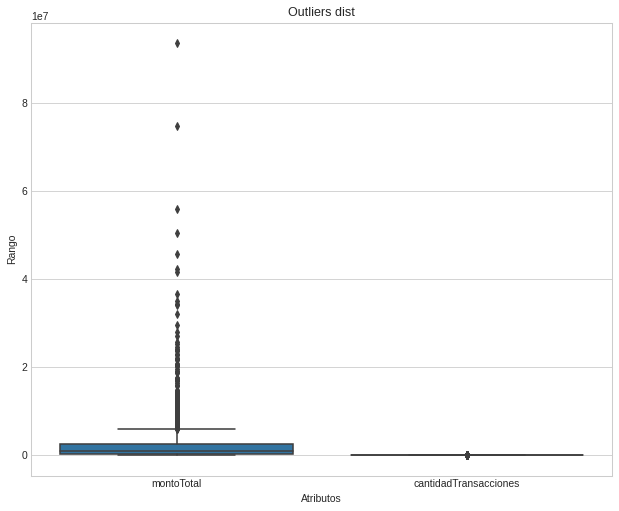

In [123]:
attr = ["montoTotal", "cantidadTransacciones"]
plt.figure(figsize = (10,8))
sns.boxplot(data = df_marzo[attr], orient = "v")
plt.title("Outliers dist")
plt.ylabel("Rango")
plt.xlabel("Atributos")

## Abril

In [74]:
df_consolidados_abril = df_consolidados_aux[df_consolidados_aux["Período"].dt.month == 4]
df_consolidados_aux_abril = df_consolidados_abril.copy()

In [75]:
df_consolidados_abril.sample(2)

,RUT,razonSocial,codSII,porcentajeComision,comisionFija,cantidadTransacciones,montoTotal,comisionNeta,comisionIVA,Tipo,Período,MCC
11393,76387101-0,VENTAS E INVERSIONES CRISTINA ANDREA ARAYA VEG...,661903.0,1.17,0.0,5.0,31000.0,363.0,69.0,DEBITO,2022-04-01,OTROS SERVICIOS PROFESIONALES
8406,11138061-9,MARISOL CELESTINA DIAZ MARTINEZ,472101.0,2.32,0.0,8.0,43490.0,1009.0,192.0,CREDITO,2022-04-01,SUPERMERCADOS


In [76]:
df_montoTotal_abril = df_consolidados_abril.groupby(['RUT'])['montoTotal'].sum().to_frame().reset_index()
df_cantTxs_abril = df_consolidados_abril.groupby(['RUT'])['cantidadTransacciones'].sum().to_frame().reset_index()
df_neta_abril = df_consolidados_abril.groupby(['RUT'])['comisionNeta'].sum().to_frame().reset_index()
df_iva_abril = df_consolidados_abril.groupby(['RUT'])['comisionIVA'].sum().to_frame().reset_index()
df_porcentajeComision_abril = df_consolidados_abril.groupby(['RUT'])["porcentajeComision"].mean().to_frame()

In [77]:
df_consolidados_abril.sample(2)

,RUT,razonSocial,codSII,porcentajeComision,comisionFija,cantidadTransacciones,montoTotal,comisionNeta,comisionIVA,Tipo,Período,MCC
10254,12609886-3,ELARD ENRIQUE CENTELLAS JAIME,105000.0,1.17,0.0,62.0,103402.0,1208.0,232.0,DEBITO,2022-04-01,OTRAS TIENDAS DE ALIMENTOS
10249,12401962-1,SUSANA DEL CARMEN CAVADA CISTERNAS,561000.0,1.29,0.0,32.0,203400.0,2624.0,497.0,DEBITO,2022-04-01,RESTAURANT FAST FOOD


In [78]:
def getfreqcred(rut):
  df_rut = df_consolidados_abril[df_consolidados_abril["RUT"] == rut]
  return df_rut[df_rut["Tipo"] == "CREDITO"].shape[0]

In [79]:
def getfreqdeb(rut):
  df_rut = df_consolidados_abril[df_consolidados_abril["RUT"] == rut]
  return df_rut[df_rut["Tipo"] == "DEBITO"].shape[0]

In [80]:
df_consolidados_abril.drop(columns = ["montoTotal", "cantidadTransacciones", "comisionNeta", "comisionIVA", "porcentajeComision", "comisionFija", "razonSocial"], inplace = True)
df_consolidados_abril["debito"] = df_consolidados_abril["RUT"].apply(lambda x : getfreqdeb(x))
df_consolidados_abril["credito"] = df_consolidados_abril["RUT"].apply(lambda x : getfreqcred(x))

In [81]:
df_consolidados_abril.drop(columns = ["Tipo"], inplace = True)
df_debito_abril = df_consolidados_abril.groupby(['RUT'])["debito"].mean().to_frame()
df_credito_abril = df_consolidados_abril.groupby(['RUT'])["credito"].mean().to_frame()

In [82]:
df_consolidados_abril.drop_duplicates(inplace = True)

In [83]:
df_consolidados_abril.drop_duplicates(subset = "RUT", keep="first", inplace = True)

In [84]:
data_frames_abril = [df_montoTotal_abril, df_cantTxs_abril, df_neta_abril, df_iva_abril, df_porcentajeComision_abril,
                     df_debito_abril, df_credito_abril, df_consolidados_abril]

In [85]:
from functools import reduce
df_abril = reduce(lambda  left,right: pd.merge(left,right,on=['RUT']), data_frames_abril)

In [86]:
df_abril["porcentajeComision"] = df_abril["porcentajeComision"].round(decimals = 2)

In [87]:
df_abril.drop(columns = ["debito_x", "credito_x"], inplace=True)
df_abril.rename(columns = {"credito_y":"credito", "debito_y":"debito"}, inplace = True)

In [88]:
df_abril.sample(2)

,RUT,montoTotal,cantidadTransacciones,comisionNeta,comisionIVA,porcentajeComision,codSII,Período,MCC,debito,credito
1865,77503512-9,533000.0,53.0,7809.0,1483.0,1.90,471990.0,2022-04-01,NaN,1,1
1765,77471435-9,428200.0,61.0,5635.0,1069.0,1.77,561000.0,2022-04-01,RESTAURANT FAST FOOD,1,1


merge c/ incidencias

In [89]:
df_abril = pd.merge(df_abril, df_ocurrencias, on = ["RUT"], how= "outer")
df_abril = df_abril[df_abril['montoTotal'].notna()]

In [90]:
df_abril["has_hes"] = np.where((df_abril["count_hes"].isnull()), 0, 1)
df_abril.drop(columns = ["count_hes"], inplace = True)

In [91]:
df_abril.shape

(2206, 12)

In [92]:
df_abril.sample(4)

,RUT,montoTotal,cantidadTransacciones,comisionNeta,comisionIVA,porcentajeComision,codSII,Período,MCC,debito,credito,has_hes
2059,8220909-3,9000.0,1.0,105.0,20.0,1.17,478900.0,2022-04-01,OTRAS TIENDAS DE ALIMENTOS,1.0,0.0,0
1547,77358512-1,2653479.0,243.0,42802.0,8156.0,1.77,561000.0,2022-04-01,RESTAURANT FAST FOOD,1.0,1.0,1
677,22321212-3,472000.0,22.0,6560.0,1246.0,1.39,960200.0,2022-04-01,PELUQUERIAS Y SALONES DE BELLEZA,1.0,0.0,0
535,16997859-K,6626100.0,528.0,90674.0,17237.0,1.77,561000.0,2022-04-01,RESTAURANT FAST FOOD,2.0,2.0,0


In [93]:
df_abril.drop(columns = "Período", inplace = True)

In [94]:
#df_abril.to_csv("df_abril.csv")

In [119]:
df_abril.describe()

,montoTotal,cantidadTransacciones,comisionNeta,comisionIVA,porcentajeComision,codSII,debito,credito,has_hes
count,2.206000e+03,2206.000000,2.206000e+03,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000
mean,2.551632e+06,233.749320,3.489815e+04,6632.612874,1.600775,492146.805077,1.085675,0.763373,0.279238
std,4.949502e+06,433.661463,7.210602e+04,13703.532564,0.310100,177044.206305,0.430581,0.612226,0.448727
min,1.000000e+02,1.000000,0.000000e+00,0.000000,0.000000,11306.000000,0.000000,0.000000,0.000000
25%,2.478500e+05,18.250000,3.116500e+03,593.000000,1.290000,472101.000000,1.000000,0.000000,0.000000
50%,9.248400e+05,80.000000,1.205600e+04,2288.000000,1.690000,472200.000000,1.000000,1.000000,0.000000
75%,2.650118e+06,258.750000,3.525775e+04,6689.250000,1.800000,522120.000000,1.000000,1.000000,1.000000
max,7.379164e+07,4644.000000,1.114258e+06,211672.000000,2.800000,960909.000000,6.000000,6.000000,1.000000


Text(0.5, 0, 'Atributos')

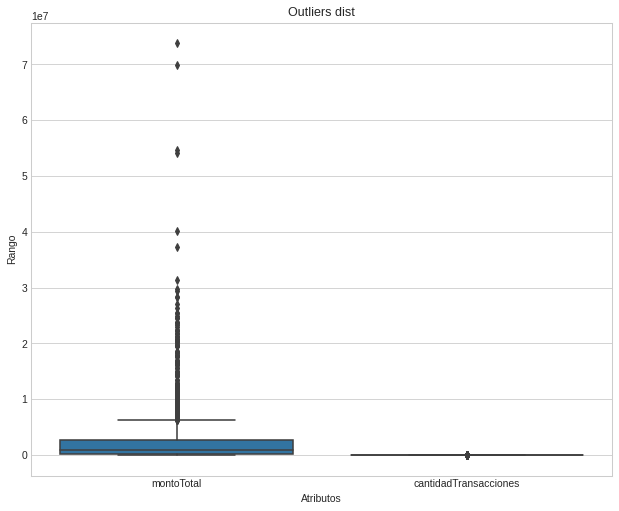

In [124]:
attr = ["montoTotal", "cantidadTransacciones"]
plt.figure(figsize = (10,8))
sns.boxplot(data = df_abril[attr], orient = "v")
plt.title("Outliers dist")
plt.ylabel("Rango")
plt.xlabel("Atributos")

## Mayo 

In [95]:
df_consolidados_mayo = df_consolidados_aux[df_consolidados_aux["Período"].dt.month == 5]
df_consolidados_aux_mayo = df_consolidados_mayo.copy()

In [96]:
df_consolidados_mayo.sample(2)

,RUT,razonSocial,codSII,porcentajeComision,comisionFija,cantidadTransacciones,montoTotal,comisionNeta,comisionIVA,Tipo,Período,MCC
17204,9311377-2,GLADYS AGUSTINA COFRE MANCEAU,472101.0,2.42,0.0,1.0,26500.0,641.0,122.0,CREDITO,2022-05-01,SUPERMERCADOS
12925,12956446-6,CLAUDIO ANDRES PACHECO HERRERA,472109.0,2.40,0.0,11.0,86000.0,2064.0,392.0,CREDITO,2022-05-01,OTRAS TIENDAS DE ALIMENTOS


In [97]:
df_montoTotal_mayo = df_consolidados_mayo.groupby(['RUT'])['montoTotal'].sum().to_frame().reset_index()
df_cantTxs_mayo = df_consolidados_mayo.groupby(['RUT'])['cantidadTransacciones'].sum().to_frame().reset_index()
df_neta_mayo = df_consolidados_mayo.groupby(['RUT'])['comisionNeta'].sum().to_frame().reset_index()
df_iva_mayo = df_consolidados_mayo.groupby(['RUT'])['comisionIVA'].sum().to_frame().reset_index()
df_porcentajeComision_mayo = df_consolidados_mayo.groupby(['RUT'])["porcentajeComision"].mean().to_frame()

In [98]:
df_consolidados_mayo.sample(2)

,RUT,razonSocial,codSII,porcentajeComision,comisionFija,cantidadTransacciones,montoTotal,comisionNeta,comisionIVA,Tipo,Período,MCC
14371,76364045-0,PRODUCTOS SERVICIOS Y GESTION PEREZ E IRIARTE ...,750001.0,1.29,0.0,8.0,437810.0,5646.0,1073.0,DEBITO,2022-05-01,CLINICAS VETERINARIAS
14455,76467444-8,AGUAS PURIFICADAS TRANCURA LIMITADA,353002.0,1.27,0.0,3.0,7340.0,93.0,17.0,DEBITO,2022-05-01,OTRAS TIENDAS DE ALIMENTOS


In [99]:
def getfreqcred(rut):
  df_rut = df_consolidados_mayo[df_consolidados_mayo["RUT"] == rut]
  return df_rut[df_rut["Tipo"] == "CREDITO"].shape[0]

In [100]:
def getfreqdeb(rut):
  df_rut = df_consolidados_mayo[df_consolidados_mayo["RUT"] == rut]
  return df_rut[df_rut["Tipo"] == "DEBITO"].shape[0]

In [101]:
df_consolidados_mayo.drop(columns = ["montoTotal", "cantidadTransacciones", "comisionNeta", "comisionIVA", "porcentajeComision", "comisionFija", "razonSocial"], inplace = True)
df_consolidados_mayo["debito"] = df_consolidados_mayo["RUT"].apply(lambda x : getfreqdeb(x))
df_consolidados_mayo["credito"] = df_consolidados_mayo["RUT"].apply(lambda x : getfreqcred(x))

In [102]:
df_consolidados_mayo.drop(columns = ["Tipo"], inplace = True)
df_debito_mayo = df_consolidados_mayo.groupby(['RUT'])["debito"].mean().to_frame()
df_credito_mayo = df_consolidados_mayo.groupby(['RUT'])["credito"].mean().to_frame()

In [103]:
df_consolidados_mayo.drop_duplicates(inplace = True)

In [104]:
df_consolidados_mayo.drop_duplicates(subset = "RUT", keep="first", inplace = True)

In [105]:
data_frames_mayo = [df_montoTotal_mayo, df_cantTxs_mayo, df_neta_mayo, df_iva_mayo, df_porcentajeComision_mayo,
                     df_debito_mayo, df_credito_mayo, df_consolidados_mayo]

In [106]:
from functools import reduce
df_mayo = reduce(lambda  left,right: pd.merge(left,right,on=['RUT']), data_frames_mayo)

In [107]:
df_mayo["porcentajeComision"] = df_mayo["porcentajeComision"].round(decimals = 2)

In [108]:
df_mayo.drop(columns = ["debito_x", "credito_x"], inplace=True)
df_mayo.rename(columns = {"credito_y":"credito", "debito_y":"debito"}, inplace = True)

In [109]:
df_mayo.sample(2)

,RUT,montoTotal,cantidadTransacciones,comisionNeta,comisionIVA,porcentajeComision,codSII,Período,MCC,debito,credito
1617,77204932-3,128249.0,4.0,1655.0,315.0,1.29,477391.0,2022-05-01,ANIMALES DOMESTICOS,1,0
1566,77164325-6,100.0,1.0,1.0,0.0,1.31,477399.0,2022-05-01,TIENDAS LIBRES DE IMPUESTO,1,0


merge c/ incidencias

In [110]:
df_mayo = pd.merge(df_mayo, df_ocurrencias, on = ["RUT"], how= "outer")
df_mayo = df_mayo[df_mayo['montoTotal'].notna()]

In [111]:
df_mayo["has_hes"] = np.where((df_mayo["count_hes"].isnull()), 0, 1)
df_mayo.drop(columns = ["count_hes"], inplace = True)

In [112]:
df_mayo.shape

(2629, 12)

In [113]:
df_mayo.sample(4)

,RUT,montoTotal,cantidadTransacciones,comisionNeta,comisionIVA,porcentajeComision,codSII,Período,MCC,debito,credito,has_hes
642,17454339-9,145640.0,20.0,1875.0,356.0,1.29,472101.0,2022-05-01,SUPERMERCADOS,1.0,0.0,1
751,19258596-1,1409335.0,76.0,18717.0,3559.0,1.90,476309.0,2022-05-01,CARPAS,1.0,1.0,0
2321,77538359-3,100.0,1.0,2.0,0.0,2.21,477102.0,2022-05-01,"VESTUARIO HOMBRES, MUJERES Y NINOS",0.0,1.0,1
2347,77545449-0,147710.0,47.0,1730.0,330.0,1.17,107909.0,2022-05-01,OTRAS TIENDAS DE ALIMENTOS,1.0,0.0,0


In [114]:
df_mayo.drop(columns = "Período", inplace = True)

In [115]:
#df_mayo.to_csv("df_mayo.csv")

In [120]:
df_mayo.describe()

,montoTotal,cantidadTransacciones,comisionNeta,comisionIVA,porcentajeComision,codSII,debito,credito,has_hes
count,2.629000e+03,2629.000000,2.629000e+03,2629.000000,2629.000000,2629.000000,2629.000000,2629.000000,2629.000000
mean,2.707898e+06,244.495245,3.735287e+04,7098.849372,1.614462,498379.002663,1.083682,0.779003,0.257893
std,5.428043e+06,459.072098,8.191032e+04,15563.799217,0.315398,181144.075284,0.444649,0.620735,0.437558
min,1.000000e+02,1.000000,0.000000e+00,0.000000,0.000000,11306.000000,0.000000,0.000000,0.000000
25%,2.659000e+05,18.000000,3.483000e+03,662.000000,1.290000,472101.000000,1.000000,0.000000,0.000000
50%,9.587300e+05,84.000000,1.297700e+04,2469.000000,1.690000,472200.000000,1.000000,1.000000,0.000000
75%,2.859930e+06,270.000000,3.796400e+04,7207.000000,1.810000,561000.000000,1.000000,1.000000,1.000000
max,9.757070e+07,5535.000000,1.545152e+06,293519.000000,2.900000,960909.000000,7.000000,6.000000,1.000000


Text(0.5, 0, 'Atributos')

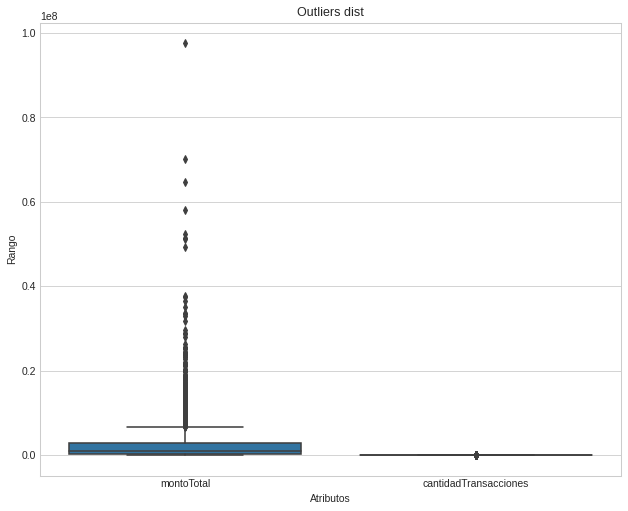

In [125]:
attr = ["montoTotal", "cantidadTransacciones"]
plt.figure(figsize = (10,8))
sns.boxplot(data = df_mayo[attr], orient = "v")
plt.title("Outliers dist")
plt.ylabel("Rango")
plt.xlabel("Atributos")